In [1]:
import dsmanipulator.dsloader as dsl
import dsmanipulator.dscreator as dsc
import dsmanipulator.dsanalyzer as dsa

from dsmanipulator.utils.dataobjects import FileColumnNames


from bidict import bidict
import numpy as np
import pandas as pd

In [38]:
# df = pd.read_csv("data/mega104-14-12-18-ioa.csv", delimiter=";", nrows=10000000)

# # df.columns.values

# a = df.dtypes.to_dict()

# a.values()

# dsl.detect_columns("data/mega104-14-12-18-ioa.csv")

# d = dsl.detect_dialect("data/mega104-14-12-18-ioa.csv")
import csv
p = csv.Sniffer().sniff("TimeStamp;RelativeT;ime")
# print(p)

a = pd.read_csv("data/mega104-14-12-18-ioa.csv", dialect=p)

type(a.iloc[6,5])
type(a.dtypes[0])
str(np.dtype('object'))

'object'

In [2]:
col_names = FileColumnNames("TimeStamp", "Relative Time", "srcIP", "dstIP", "srcPort", "dstPort")
%time df = dsl.load_data("data/mega104-14-12-18-ioa.csv", col_names)
%time df = dsc.add_relative_days(df)
%time df = dsc.convert_to_timeseries(df)
%time df = dsc.add_communication_id_l3(df)
%time df = dsc.add_communication_id_l4(df)
%time df = dsc.add_communication_direction(df, "192.168.11.111")
%time df = dsc.add_inter_arrival_time_ad(df)
%time df = dsc.add_inter_arrival_time_sd(df)

CPU times: user 538 ms, sys: 6.93 ms, total: 545 ms
Wall time: 544 ms
CPU times: user 1.52 ms, sys: 0 ns, total: 1.52 ms
Wall time: 1.46 ms
CPU times: user 2.97 ms, sys: 0 ns, total: 2.97 ms
Wall time: 2.91 ms
CPU times: user 28.3 ms, sys: 0 ns, total: 28.3 ms
Wall time: 28.1 ms
CPU times: user 29.6 ms, sys: 0 ns, total: 29.6 ms
Wall time: 29.3 ms
CPU times: user 1.72 ms, sys: 0 ns, total: 1.72 ms
Wall time: 1.6 ms
CPU times: user 930 µs, sys: 0 ns, total: 930 µs
Wall time: 868 µs
CPU times: user 1.64 ms, sys: 56 µs, total: 1.7 ms
Wall time: 1.59 ms


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14597 entries, 2022-02-22 17:15:49.910000 to 2022-02-23 08:53:51.080000
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   relTime             14597 non-null  float64 
 1   srcIp               14597 non-null  object  
 2   dstIp               14597 non-null  object  
 3   srcPort             14597 non-null  int64   
 4   dstPort             14597 non-null  int64   
 5   ipLen               14597 non-null  int64   
 6   len                 14597 non-null  int64   
 7   fmt                 14597 non-null  object  
 8   uType               1156 non-null   category
 9   asduType            9657 non-null   category
 10  numix               9657 non-null   category
 11  cot                 9657 non-null   category
 12  oa                  9657 non-null   category
 13  addr                9657 non-null   float64 
 14  ioa                 9657 non-null   o

In [4]:
b = dsc.expand_values_to_columns(df, 'asduType')
b

,relTime,srcIp,dstIp,srcPort,dstPort,ipLen,len,fmt,uType,asduType,...,masterToSlave,interArrivalTimeAD,interArrivalTimeSD,asduType:122,asduType:120,asduType:121,asduType:125,asduType:123,asduType:124,asduType:36
timeStamp,,,,,,,,,,,,,,,,,,,,,
2022-02-22 17:15:49.910,0.000000,192.168.11.111,192.168.11.248,56693,2404,59,17,0x00000000,NaN,122,...,True,0.000000,0.000000,True,False,False,False,False,False,False
2022-02-22 17:15:49.940,0.029377,192.168.11.248,192.168.11.111,2404,56693,61,19,0x00000000,NaN,120,...,False,0.029377,0.000000,False,True,False,False,False,False,False
2022-02-22 17:15:49.940,0.029617,192.168.11.111,192.168.11.248,56693,2404,59,17,0x00000000,NaN,122,...,True,0.000240,0.029617,True,False,False,False,False,False,False
2022-02-22 17:15:49.940,0.031586,192.168.11.248,192.168.11.111,2404,56693,62,20,0x00000000,NaN,121,...,False,0.001969,0.002209,False,False,True,False,False,False,False
2022-02-22 17:15:49.970,0.062488,192.168.11.111,192.168.11.248,56693,2404,59,17,0x00000000,NaN,122,...,True,0.030902,0.032871,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-23 08:53:34.300,56264.388718,192.168.11.111,192.168.11.248,56693,2404,46,4,0x00000001,NaN,NaN,...,True,1.013551,14.399533,False,False,False,False,False,False,False
2022-02-23 08:53:37.280,56267.374012,192.168.11.248,192.168.11.111,2404,56693,67,25,0x00000000,NaN,36,...,False,2.985294,3.998845,False,False,False,False,False,False,True
2022-02-23 08:53:41.280,56271.373875,192.168.11.248,192.168.11.111,2404,56693,67,25,0x00000000,NaN,36,...,False,3.999863,3.999863,False,False,False,False,False,False,True


,count
timeStamp,
2022-02-22 17:00:00,1382
2022-02-22 18:00:00,1047
2022-02-22 19:00:00,965
2022-02-22 20:00:00,969
2022-02-22 21:00:00,918
2022-02-22 22:00:00,907
2022-02-22 23:00:00,782
2022-02-23 00:00:00,812
2022-02-23 01:00:00,741


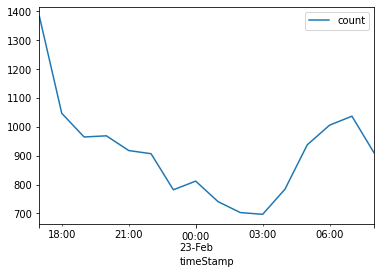

In [5]:
df['count'] = True
x = df.loc[:,['count']]
x = x.resample('1h').sum()
x.plot()
x

In [6]:
df.query("")

ValueError: expr cannot be an empty string